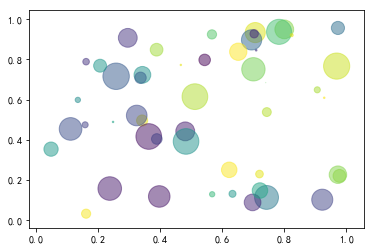

In [1]:
#Scatter plot

import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

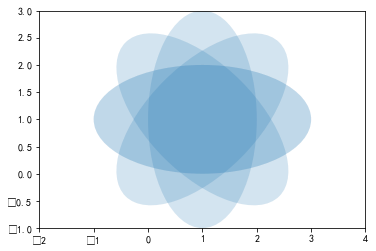

In [2]:
#Ellipse Rotated

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

delta = 45.0  # degrees

angles = np.arange(0, 360 + delta, delta)
ells = [Ellipse((1, 1), 4, 2, a) for a in angles]

a = plt.subplot(111, aspect='equal')

for e in ells:
    e.set_clip_box(a.bbox)
    e.set_alpha(0.1)
    a.add_artist(e)

plt.xlim(-2, 4)
plt.ylim(-1, 3)

plt.show()

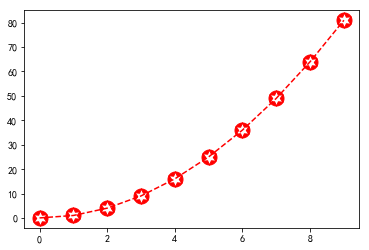

In [3]:
#Marker Path

import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np


star = mpath.Path.unit_regular_star(6)
circle = mpath.Path.unit_circle()
# concatenate the circle with an internal cutout of the star
verts = np.concatenate([circle.vertices, star.vertices[::-1, ...]])
codes = np.concatenate([circle.codes, star.codes])
cut_star = mpath.Path(verts, codes)


plt.plot(np.arange(10)**2, '--r', marker=cut_star, markersize=15)

plt.show()

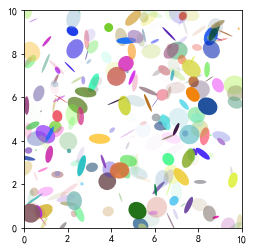

In [4]:
#Ellipse Demo
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

NUM = 250

ells = [Ellipse(xy=np.random.rand(2) * 10,
                width=np.random.rand(), height=np.random.rand(),
                angle=np.random.rand() * 360)
        for i in range(NUM)]

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(np.random.rand())
    e.set_facecolor(np.random.rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()

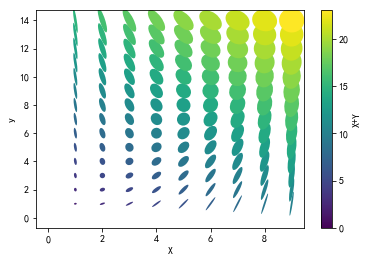

In [5]:
#Ellipse Collection

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import EllipseCollection

x = np.arange(10)
y = np.arange(15)
X, Y = np.meshgrid(x, y)

XY = np.hstack((X.ravel()[:, np.newaxis], Y.ravel()[:, np.newaxis]))

ww = X / 10.0
hh = Y / 15.0
aa = X * 9


fig, ax = plt.subplots()

ec = EllipseCollection(ww, hh, aa, units='x', offsets=XY,
                       transOffset=ax.transData)
ec.set_array((X + Y).ravel())
ax.add_collection(ec)
ax.autoscale_view()
ax.set_xlabel('X')
ax.set_ylabel('y')
cbar = plt.colorbar(ec)
cbar.set_label('X+Y')
plt.show()

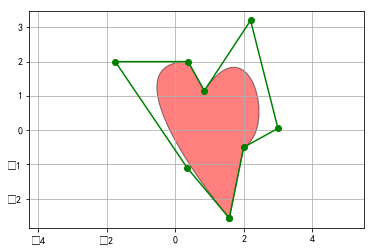

In [6]:
#PathPatch object

import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()

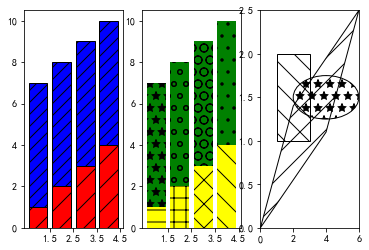

In [7]:
#Hatch Demo
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon

fig = plt.figure()
ax1 = fig.add_subplot(131)
ax1.bar(range(1, 5), range(1, 5), color='red', edgecolor='black', hatch="/")
ax1.bar(range(1, 5), [6] * 4, bottom=range(1, 5),
        color='blue', edgecolor='black', hatch='//')
ax1.set_xticks([1.5, 2.5, 3.5, 4.5])

ax2 = fig.add_subplot(132)
bars = ax2.bar(range(1, 5), range(1, 5), color='yellow', ecolor='black') + \
    ax2.bar(range(1, 5), [6] * 4, bottom=range(1, 5),
            color='green', ecolor='black')
ax2.set_xticks([1.5, 2.5, 3.5, 4.5])

patterns = ('-', '+', 'x', '\\', '*', 'o', 'O', '.')
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

ax3 = fig.add_subplot(133)
ax3.fill([1, 3, 3, 1], [1, 1, 2, 2], fill=False, hatch='\\')
ax3.add_patch(Ellipse((4, 1.5), 4, 0.5, fill=False, hatch='*'))
ax3.add_patch(Polygon([[0, 0], [4, 1.1], [6, 2.5], [2, 1.4]], closed=True,
                      fill=False, hatch='/'))
ax3.set_xlim((0, 6))
ax3.set_ylim((0, 2.5))

plt.show()

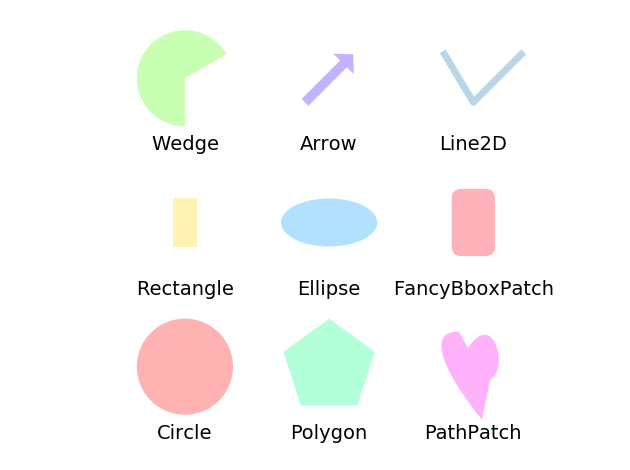

In [8]:
#Reference for matplotlib artists

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection


plt.rcdefaults()


def label(xy, text):
    y = xy[1] - 0.15  # shift y-value for label so that it's below the artist
    plt.text(xy[0], y, text, ha="center", family='sans-serif', size=14)


fig, ax = plt.subplots()
# create 3x3 grid to plot the artists
grid = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1).T

patches = []

# add a circle
circle = mpatches.Circle(grid[0], 0.1, ec="none")
patches.append(circle)
label(grid[0], "Circle")

# add a rectangle
rect = mpatches.Rectangle(grid[1] - [0.025, 0.05], 0.05, 0.1, ec="none")
patches.append(rect)
label(grid[1], "Rectangle")

# add a wedge
wedge = mpatches.Wedge(grid[2], 0.1, 30, 270, ec="none")
patches.append(wedge)
label(grid[2], "Wedge")

# add a Polygon
polygon = mpatches.RegularPolygon(grid[3], 5, 0.1)
patches.append(polygon)
label(grid[3], "Polygon")

# add an ellipse
ellipse = mpatches.Ellipse(grid[4], 0.2, 0.1)
patches.append(ellipse)
label(grid[4], "Ellipse")

# add an arrow
arrow = mpatches.Arrow(grid[5, 0] - 0.05, grid[5, 1] - 0.05, 0.1, 0.1,
                       width=0.1)
patches.append(arrow)
label(grid[5], "Arrow")

# add a path patch
Path = mpath.Path
path_data = [
    (Path.MOVETO, [0.018, -0.11]),
    (Path.CURVE4, [-0.031, -0.051]),
    (Path.CURVE4, [-0.115, 0.073]),
    (Path.CURVE4, [-0.03, 0.073]),
    (Path.LINETO, [-0.011, 0.039]),
    (Path.CURVE4, [0.043, 0.121]),
    (Path.CURVE4, [0.075, -0.005]),
    (Path.CURVE4, [0.035, -0.027]),
    (Path.CLOSEPOLY, [0.018, -0.11])]
codes, verts = zip(*path_data)
path = mpath.Path(verts + grid[6], codes)
patch = mpatches.PathPatch(path)
patches.append(patch)
label(grid[6], "PathPatch")

# add a fancy box
fancybox = mpatches.FancyBboxPatch(
    grid[7] - [0.025, 0.05], 0.05, 0.1,
    boxstyle=mpatches.BoxStyle("Round", pad=0.02))
patches.append(fancybox)
label(grid[7], "FancyBboxPatch")

# add a line
x, y = np.array([[-0.06, 0.0, 0.1], [0.05, -0.05, 0.05]])
line = mlines.Line2D(x + grid[8, 0], y + grid[8, 1], lw=5., alpha=0.3)
label(grid[8], "Line2D")

colors = np.linspace(0, 1, len(patches))
collection = PatchCollection(patches, cmap=plt.cm.hsv, alpha=0.3)
collection.set_array(np.array(colors))
ax.add_collection(collection)
ax.add_line(line)

plt.axis('equal')
plt.axis('off')
plt.tight_layout()

plt.show()

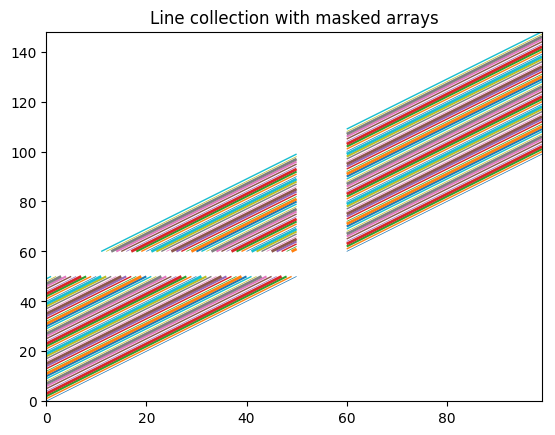

In [9]:
#Line Collection

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import colors as mcolors

import numpy as np

# In order to efficiently plot many lines in a single set of axes,
# Matplotlib has the ability to add the lines all at once. Here is a
# simple example showing how it is done.

x = np.arange(100)
# Here are many sets of y to plot vs x
ys = x[:50, np.newaxis] + x[np.newaxis, :]

segs = np.zeros((50, 100, 2), float)
segs[:, :, 1] = ys
segs[:, :, 0] = x

# Mask some values to test masked array support:
segs = np.ma.masked_where((segs > 50) & (segs < 60), segs)

# We need to set the plot limits.
fig, ax = plt.subplots()
ax.set_xlim(x.min(), x.max())
ax.set_ylim(ys.min(), ys.max())

# colors is sequence of rgba tuples
# linestyle is a string or dash tuple. Legal string values are
#          solid|dashed|dashdot|dotted.  The dash tuple is (offset, onoffseq)
#          where onoffseq is an even length tuple of on and off ink in points.
#          If linestyle is omitted, 'solid' is used
# See :class:`matplotlib.collections.LineCollection` for more information
colors = [mcolors.to_rgba(c)
          for c in plt.rcParams['axes.prop_cycle'].by_key()['color']]

line_segments = LineCollection(segs, linewidths=(0.5, 1, 1.5, 2),
                               colors=colors, linestyle='solid')
ax.add_collection(line_segments)
ax.set_title('Line collection with masked arrays')
plt.show()

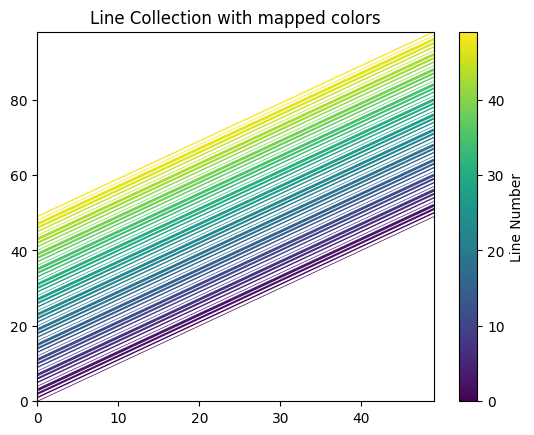

In [10]:
N = 50
x = np.arange(N)
# Here are many sets of y to plot vs x
ys = [x + i for i in x]

# We need to set the plot limits, they will not autoscale
fig, ax = plt.subplots()
ax.set_xlim(np.min(x), np.max(x))
ax.set_ylim(np.min(ys), np.max(ys))

# colors is sequence of rgba tuples
# linestyle is a string or dash tuple. Legal string values are
#          solid|dashed|dashdot|dotted.  The dash tuple is (offset, onoffseq)
#          where onoffseq is an even length tuple of on and off ink in points.
#          If linestyle is omitted, 'solid' is used
# See :class:`matplotlib.collections.LineCollection` for more information

# Make a sequence of x,y pairs
line_segments = LineCollection([list(zip(x, y)) for y in ys],
                               linewidths=(0.5, 1, 1.5, 2),
                               linestyles='solid')
line_segments.set_array(x)
ax.add_collection(line_segments)
axcb = fig.colorbar(line_segments)
axcb.set_label('Line Number')
ax.set_title('Line Collection with mapped colors')
plt.sci(line_segments)  # This allows interactive changing of the colormap.
plt.show()

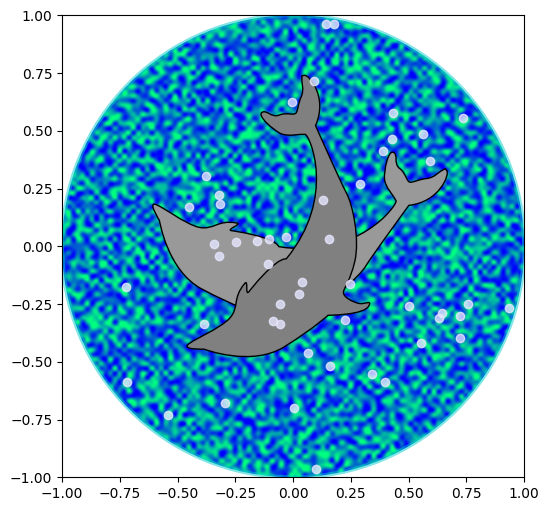

In [11]:
#Dolphins

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, PathPatch
from matplotlib.path import Path
from matplotlib.transforms import Affine2D
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


r = np.random.rand(50)
t = np.random.rand(50) * np.pi * 2.0
x = r * np.cos(t)
y = r * np.sin(t)

fig, ax = plt.subplots(figsize=(6, 6))
circle = Circle((0, 0), 1, facecolor='none',
                edgecolor=(0, 0.8, 0.8), linewidth=3, alpha=0.5)
ax.add_patch(circle)

im = plt.imshow(np.random.random((100, 100)),
                origin='lower', cmap=cm.winter,
                interpolation='spline36',
                extent=([-1, 1, -1, 1]))
im.set_clip_path(circle)

plt.plot(x, y, 'o', color=(0.9, 0.9, 1.0), alpha=0.8)

# Dolphin from OpenClipart library by Andy Fitzsimon
#       <cc:License rdf:about="http://web.resource.org/cc/PublicDomain">
#         <cc:permits rdf:resource="http://web.resource.org/cc/Reproduction"/>
#         <cc:permits rdf:resource="http://web.resource.org/cc/Distribution"/>
#         <cc:permits rdf:resource="http://web.resource.org/cc/DerivativeWorks"/>
#       </cc:License>

dolphin = """
M -0.59739425,160.18173 C -0.62740401,160.18885 -0.57867129,160.11183
-0.57867129,160.11183 C -0.57867129,160.11183 -0.5438361,159.89315
-0.39514638,159.81496 C -0.24645668,159.73678 -0.18316813,159.71981
-0.18316813,159.71981 C -0.18316813,159.71981 -0.10322971,159.58124
-0.057804323,159.58725 C -0.029723983,159.58913 -0.061841603,159.60356
-0.071265813,159.62815 C -0.080250183,159.65325 -0.082918513,159.70554
-0.061841203,159.71248 C -0.040763903,159.7194 -0.0066711426,159.71091
0.077336307,159.73612 C 0.16879567,159.76377 0.28380306,159.86448
0.31516668,159.91533 C 0.3465303,159.96618 0.5011127,160.1771
0.5011127,160.1771 C 0.63668998,160.19238 0.67763022,160.31259
0.66556395,160.32668 C 0.65339985,160.34212 0.66350443,160.33642
0.64907098,160.33088 C 0.63463742,160.32533 0.61309688,160.297
0.5789627,160.29339 C 0.54348657,160.28968 0.52329693,160.27674
0.50728856,160.27737 C 0.49060916,160.27795 0.48965803,160.31565
0.46114204,160.33673 C 0.43329696,160.35786 0.4570711,160.39871
0.43309565,160.40685 C 0.4105108,160.41442 0.39416631,160.33027
0.3954995,160.2935 C 0.39683269,160.25672 0.43807996,160.21522
0.44567915,160.19734 C 0.45327833,160.17946 0.27946869,159.9424
-0.061852613,159.99845 C -0.083965233,160.0427 -0.26176109,160.06683
-0.26176109,160.06683 C -0.30127962,160.07028 -0.21167141,160.09731
-0.24649368,160.1011 C -0.32642366,160.11569 -0.34521187,160.06895
-0.40622293,160.0819 C -0.467234,160.09485 -0.56738444,160.17461
-0.59739425,160.18173
"""

vertices = []
codes = []
parts = dolphin.split()
i = 0
code_map = {
    'M': (Path.MOVETO, 1),
    'C': (Path.CURVE4, 3),
    'L': (Path.LINETO, 1)}

while i < len(parts):
    code = parts[i]
    path_code, npoints = code_map[code]
    codes.extend([path_code] * npoints)
    vertices.extend([[float(x) for x in y.split(',')] for y in
                     parts[i + 1:i + npoints + 1]])
    i += npoints + 1
vertices = np.array(vertices, float)
vertices[:, 1] -= 160

dolphin_path = Path(vertices, codes)
dolphin_patch = PathPatch(dolphin_path, facecolor=(0.6, 0.6, 0.6),
                          edgecolor=(0.0, 0.0, 0.0))
ax.add_patch(dolphin_patch)

vertices = Affine2D().rotate_deg(60).transform(vertices)
dolphin_path2 = Path(vertices, codes)
dolphin_patch2 = PathPatch(dolphin_path2, facecolor=(0.5, 0.5, 0.5),
                           edgecolor=(0.0, 0.0, 0.0))
ax.add_patch(dolphin_patch2)

plt.show()

In [18]:
#Fancybox Demo

import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import matplotlib.patches as mpatch
from matplotlib.patches import FancyBboxPatch


In [19]:
styles = mpatch.BoxStyle.get_styles()
spacing = 1.2

figheight = (spacing * len(styles) + .5)
fig1 = plt.figure(1, (4 / 1.5, figheight / 1.5))
fontsize = 0.3 * 72

for i, stylename in enumerate(sorted(styles)):
    fig1.text(0.5, (spacing * (len(styles) - i) - 0.5) / figheight, stylename,
              ha="center",
              size=fontsize,
              transform=fig1.transFigure,
              bbox=dict(boxstyle=stylename, fc="w", ec="k"))

plt.show()

In [20]:
# Bbox object around which the fancy box will be drawn.
bb = mtransforms.Bbox([[0.3, 0.4], [0.7, 0.6]])


def draw_bbox(ax, bb):
    # boxstyle=square with pad=0, i.e. bbox itself.
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                            abs(bb.width), abs(bb.height),
                            boxstyle="square,pad=0.",
                            ec="k", fc="none", zorder=10.,
                            )
    ax.add_patch(p_bbox)


def test1(ax):

    # a fancy box with round corners. pad=0.1
    p_fancy = FancyBboxPatch((bb.xmin, bb.ymin),
                             abs(bb.width), abs(bb.height),
                             boxstyle="round,pad=0.1",
                             fc=(1., .8, 1.),
                             ec=(1., 0.5, 1.))

    ax.add_patch(p_fancy)

    ax.text(0.1, 0.8,
            r' boxstyle="round,pad=0.1"',
            size=10, transform=ax.transAxes)

    # draws control points for the fancy box.
    # l = p_fancy.get_path().vertices
    # ax.plot(l[:,0], l[:,1], ".")

    # draw the original bbox in black
    draw_bbox(ax, bb)


def test2(ax):

    # bbox=round has two optional argument. pad and rounding_size.
    # They can be set during the initialization.
    p_fancy = FancyBboxPatch((bb.xmin, bb.ymin),
                             abs(bb.width), abs(bb.height),
                             boxstyle="round,pad=0.1",
                             fc=(1., .8, 1.),
                             ec=(1., 0.5, 1.))

    ax.add_patch(p_fancy)

    # boxstyle and its argument can be later modified with
    # set_boxstyle method. Note that the old attributes are simply
    # forgotten even if the boxstyle name is same.

    p_fancy.set_boxstyle("round,pad=0.1, rounding_size=0.2")
    # or
    # p_fancy.set_boxstyle("round", pad=0.1, rounding_size=0.2)

    ax.text(0.1, 0.8,
            ' boxstyle="round,pad=0.1\n rounding_size=0.2"',
            size=10, transform=ax.transAxes)

    # draws control points for the fancy box.
    # l = p_fancy.get_path().vertices
    # ax.plot(l[:,0], l[:,1], ".")

    draw_bbox(ax, bb)


def test3(ax):

    # mutation_scale determine overall scale of the mutation,
    # i.e. both pad and rounding_size is scaled according to this
    # value.
    p_fancy = FancyBboxPatch((bb.xmin, bb.ymin),
                             abs(bb.width), abs(bb.height),
                             boxstyle="round,pad=0.1",
                             mutation_scale=2.,
                             fc=(1., .8, 1.),
                             ec=(1., 0.5, 1.))

    ax.add_patch(p_fancy)

    ax.text(0.1, 0.8,
            ' boxstyle="round,pad=0.1"\n mutation_scale=2',
            size=10, transform=ax.transAxes)

    # draws control points for the fancy box.
    # l = p_fancy.get_path().vertices
    # ax.plot(l[:,0], l[:,1], ".")

    draw_bbox(ax, bb)


def test4(ax):

    # When the aspect ratio of the axes is not 1, the fancy box may
    # not be what you expected (green)

    p_fancy = FancyBboxPatch((bb.xmin, bb.ymin),
                             abs(bb.width), abs(bb.height),
                             boxstyle="round,pad=0.2",
                             fc="none",
                             ec=(0., .5, 0.), zorder=4)

    ax.add_patch(p_fancy)

    # You can compensate this by setting the mutation_aspect (pink).
    p_fancy = FancyBboxPatch((bb.xmin, bb.ymin),
                             abs(bb.width), abs(bb.height),
                             boxstyle="round,pad=0.3",
                             mutation_aspect=.5,
                             fc=(1., 0.8, 1.),
                             ec=(1., 0.5, 1.))

    ax.add_patch(p_fancy)

    ax.text(0.1, 0.8,
            ' boxstyle="round,pad=0.3"\n mutation_aspect=.5',
            size=10, transform=ax.transAxes)

    draw_bbox(ax, bb)


def test_all():
    plt.clf()

    ax = plt.subplot(2, 2, 1)
    test1(ax)
    ax.set_xlim(0., 1.)
    ax.set_ylim(0., 1.)
    ax.set_title("test1")
    ax.set_aspect(1.)

    ax = plt.subplot(2, 2, 2)
    ax.set_title("test2")
    test2(ax)
    ax.set_xlim(0., 1.)
    ax.set_ylim(0., 1.)
    ax.set_aspect(1.)

    ax = plt.subplot(2, 2, 3)
    ax.set_title("test3")
    test3(ax)
    ax.set_xlim(0., 1.)
    ax.set_ylim(0., 1.)
    ax.set_aspect(1)

    ax = plt.subplot(2, 2, 4)
    ax.set_title("test4")
    test4(ax)
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(0., 1.)
    ax.set_aspect(2.)

    plt.draw()
    plt.show()

